In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Vasanthengineer4949/Rain-Prediction/main/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes !='O']
discrete_features=[feature for feature in df.columns if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
categorical_features=[feature for feature in df.columns if feature not in numerical_features]
print('numerical features count {}'.format(len(numerical_features)))
print('discrete features count {}'.format(len(discrete_features)))
print('continuous features count {}'.format(len(continuous_features)))
print('categorical features count {}'.format(len(categorical_features)))

numerical features count 16
discrete features count 7
continuous features count 14
categorical features count 7


In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
print(numerical_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [7]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
def randomsampleimputation(df,variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(),variable]=random_sample

In [9]:
randomsampleimputation(df,'Cloud9am')
randomsampleimputation(df,'Cloud3pm')
randomsampleimputation(df,'Evaporation')
randomsampleimputation(df,'Sunshine')

In [10]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


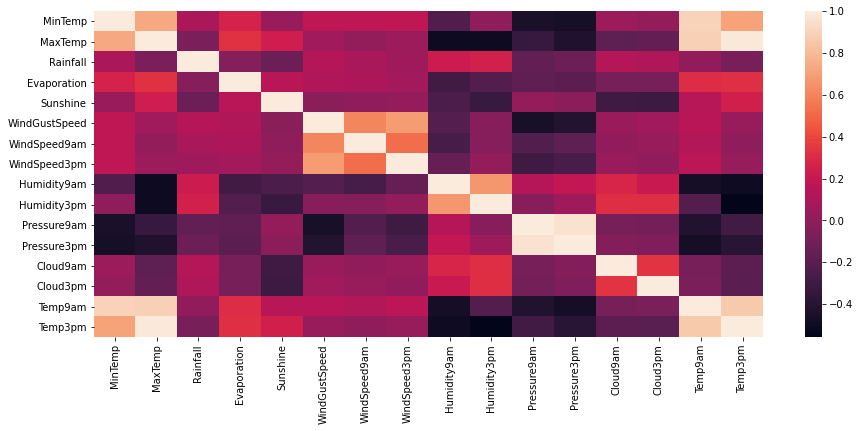

In [11]:
corrmat=df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corrmat)

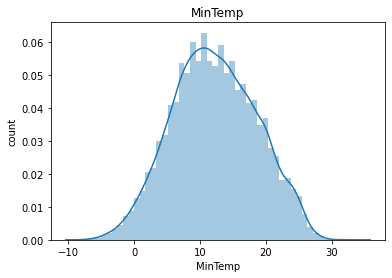

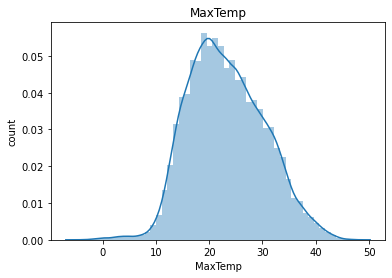

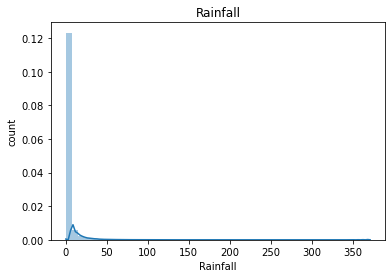

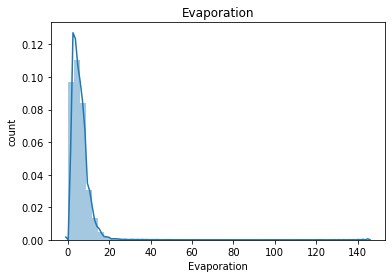

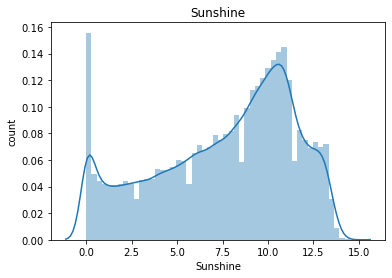

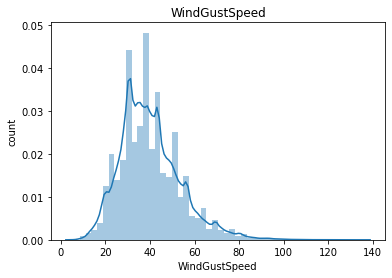

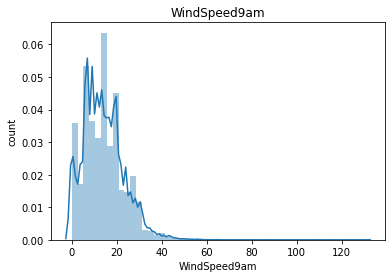

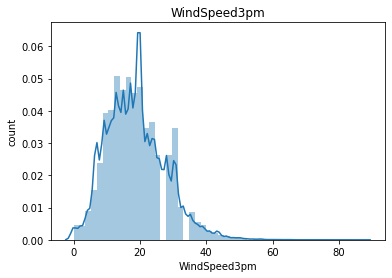

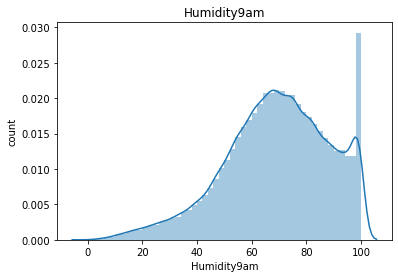

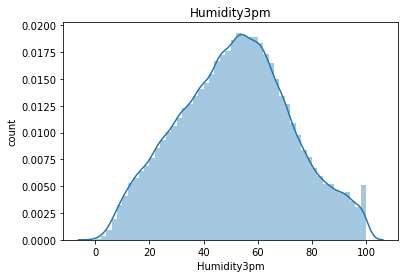

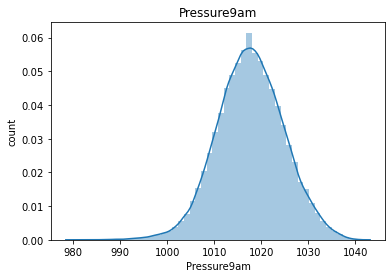

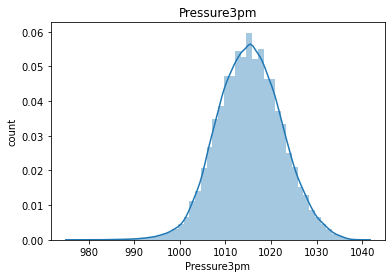

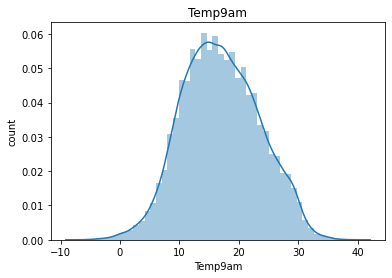

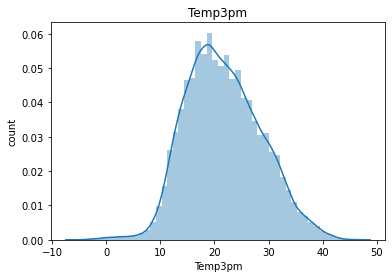

In [12]:
for feature in continuous_features:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,145460.000000,145460.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,145460.000000,145460.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.464988,7.609641,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.446556,4.508112,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.210586,3.785983,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887669,2.719517,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


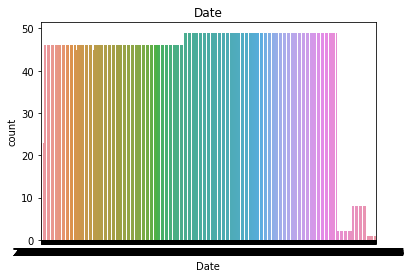

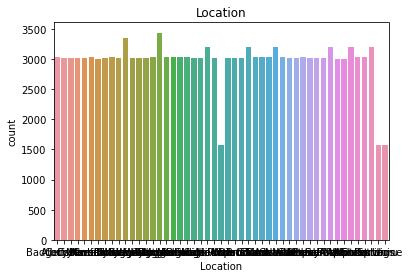

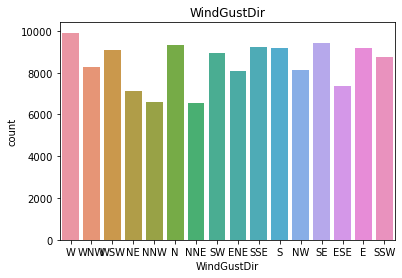

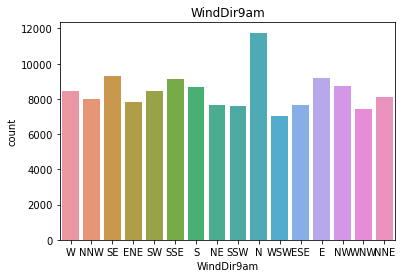

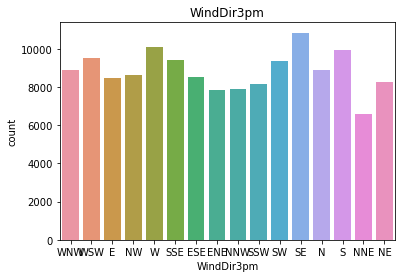

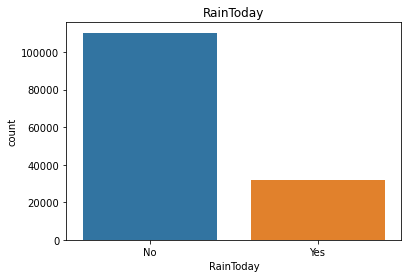

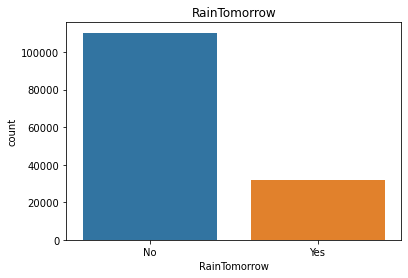

In [14]:
for feature in categorical_features:
    data=df.copy()
    sns.countplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

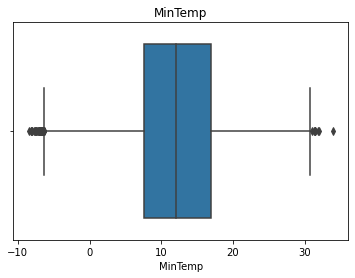

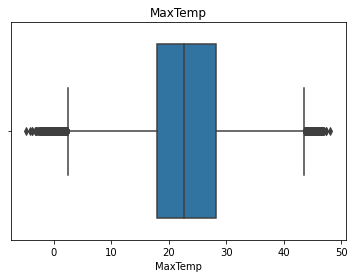

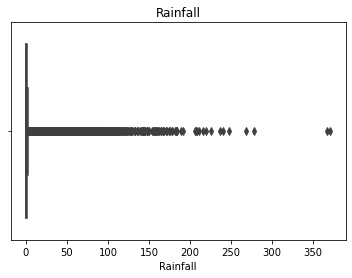

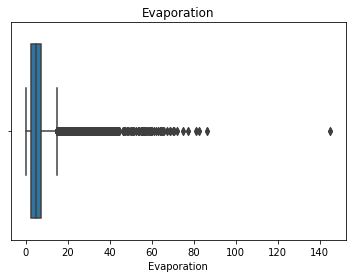

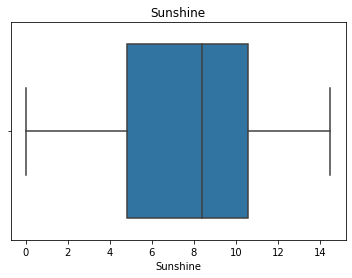

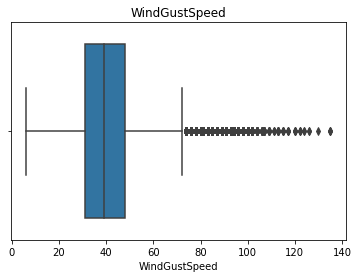

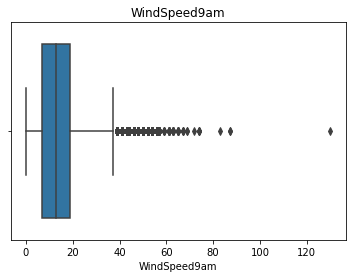

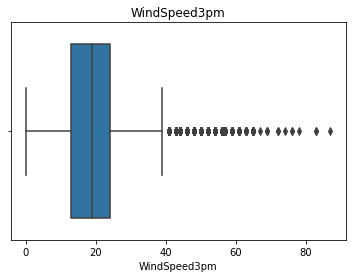

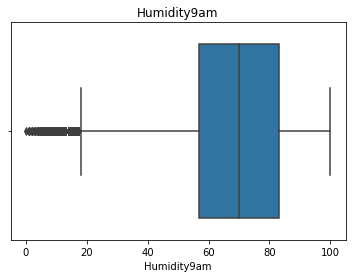

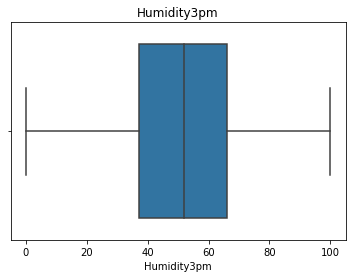

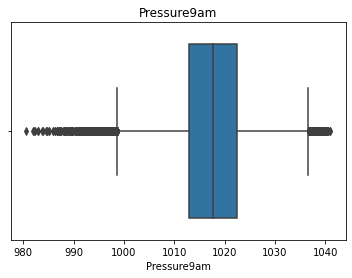

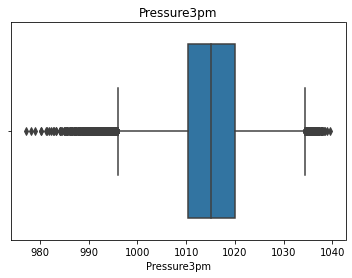

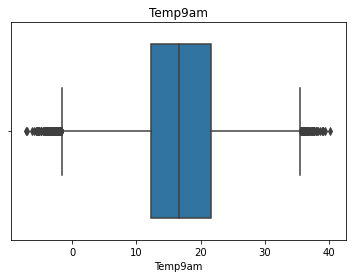

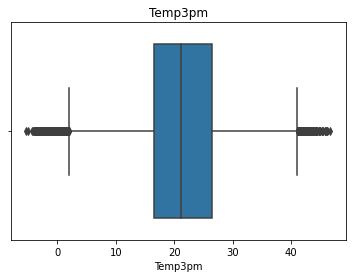

In [15]:
for feature in continuous_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.show()

In [16]:
for feature in continuous_features:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature]=df[feature].fillna(df[feature].median())

In [17]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [18]:
discrete_features

['WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
def mode(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode(df,'Cloud9am')
mode(df,'Cloud3pm')

In [20]:
df['RainToday'][df['RainToday']=='NO']=0
df['RainToday'][df['RainToday']=='YES']=1

<ipython-input-20-8f0eed324bea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'][df['RainToday']=='NO']=0
<ipython-input-20-8f0eed324bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'][df['RainToday']=='YES']=1


In [21]:
df['RainToday']=pd.get_dummies(df['RainToday'],drop_first=True)
df['RainTomorrow']=pd.get_dummies(df['RainTomorrow'],drop_first=True)

In [22]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [23]:
for feature in categorical_features:
    print(feature,(df.groupby([feature])['RainTomorrow'].mean().sort_values(ascending=False)).index)

Date Index(['2007-11-01', '2008-01-19', '2007-12-07', '2007-12-15', '2007-12-16',
       '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-22', '2007-12-24',
       ...
       '2008-05-02', '2008-05-01', '2008-04-30', '2008-04-29', '2008-04-28',
       '2008-04-26', '2008-04-25', '2016-11-26', '2012-04-07', '2008-08-17'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [24]:
windgustdir={'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am={'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm={'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df['WindGustDir']=df['WindGustDir'].map(windgustdir)
df['WindDir9am']=df['WindDir9am'].map(winddir9am)
df['WindDir3pm']=df['WindDir3pm'].map(winddir3pm)

In [25]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].mean())
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].mean())

In [26]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [27]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [28]:
df['Date']=pd.to_datetime(df['Date'],format='%y-%m-%dT',errors='raise',infer_datetime_format=True)

In [29]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [30]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,...,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,...,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,...,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,...,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,...,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,...,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,...,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


In [31]:
groupby=df.groupby(['Location'])['RainTomorrow'].value_counts().sort_values().unstack()

In [32]:
groupby

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [33]:
groupby[1].sort_values(ascending=False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [34]:
location={'Portland':0, 'Cairns':1, 'Walpole':2, 'Dartmoor':3, 'MountGambier':4,
       'NorfolkIsland':5, 'Albany':6, 'Witchcliffe':7, 'CoffsHarbour':8, 'Sydney':9,
       'Darwin':10, 'MountGinini':11, 'NorahHead':12, 'Ballarat':13, 'GoldCoast':14,
       'SydneyAirport':15, 'Hobart':16, 'Watsonia':17, 'Newcastle':18, 'Wollongong':19,
       'Brisbane':20, 'Williamtown':21, 'Launceston':22, 'Adelaide':23, 'MelbourneAirport':24,
       'Perth':25, 'Sale':26, 'Melbourne':27, 'Canberra':28, 'Albury':29, 'Penrith':30,
       'Nuriootpa':31, 'BadgerysCreek':32, 'Tuggeranong':33, 'PerthAirport':34, 'Bendigo':35,
       'Richmond':36, 'WaggaWagga':37, 'Townsville':38, 'PearceRAAF':39, 'SalmonGums':40,
       'Moree':41, 'Cobar':42, 'Mildura':43, 'Katherine':44, 'AliceSprings':45, 'Nhil':46,
       'Woomera':47, 'Uluru':48}

In [35]:
df['Location']=df['Location'].map(location)

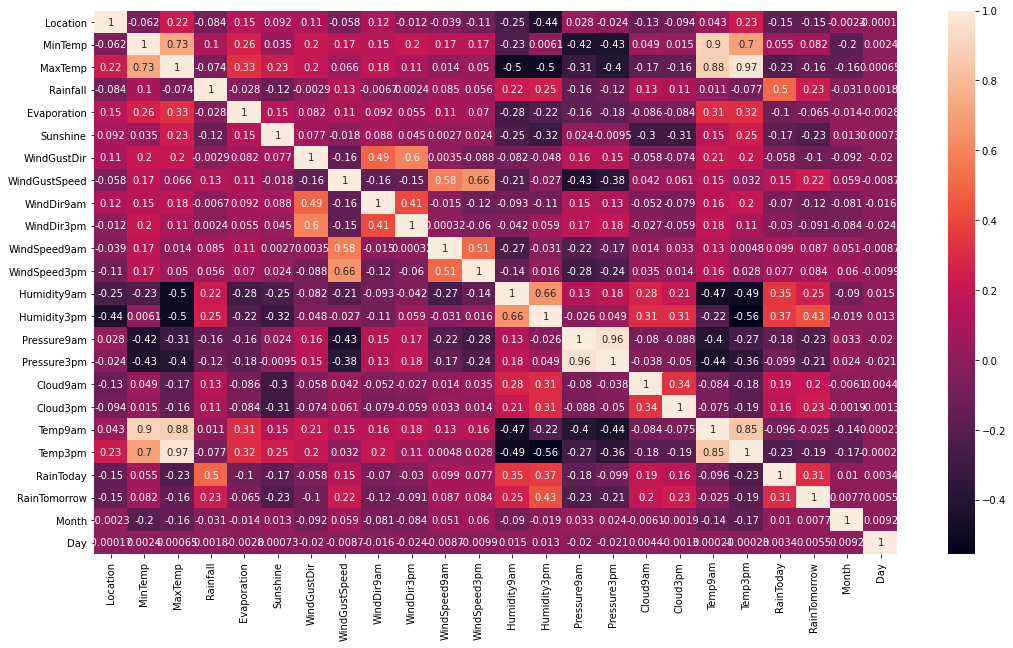

In [36]:
corrmat=df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corrmat,annot=True)

In [37]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,2008-12-01,29,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,...,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,29,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,...,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,29,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,...,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,29,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,...,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,29,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,48,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,...,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,48,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,...,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,48,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,...,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,48,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


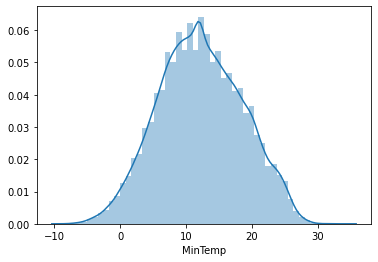

In [38]:
sns.distplot(df['MinTemp'])

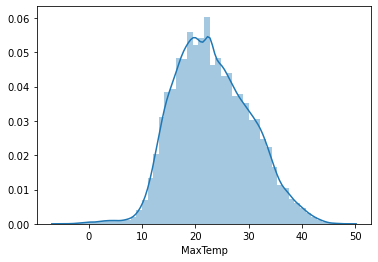

In [39]:
sns.distplot(df['MaxTemp'])

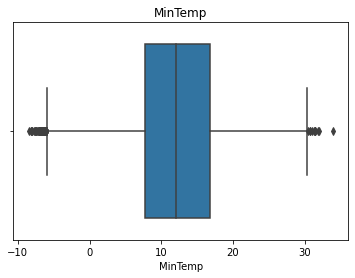

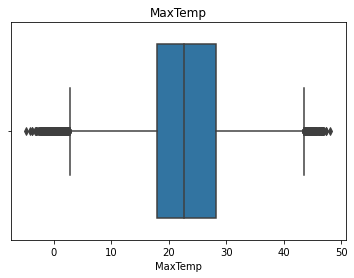

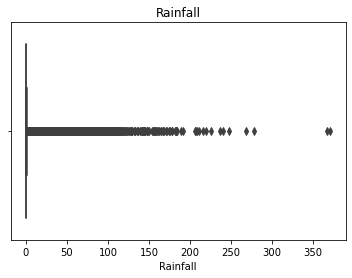

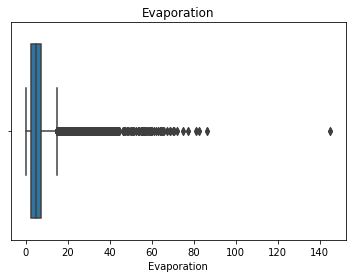

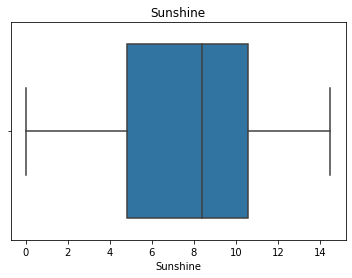

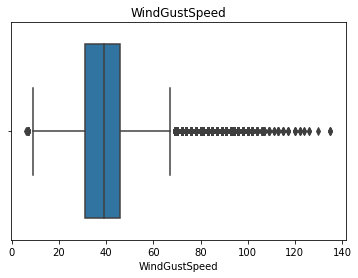

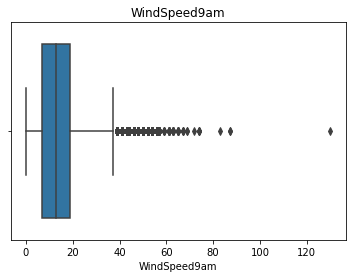

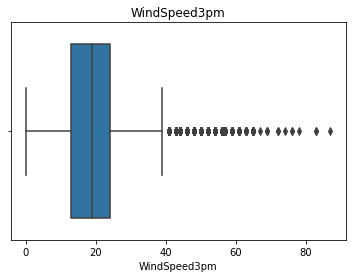

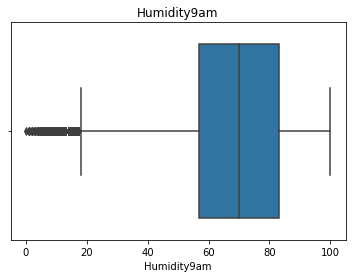

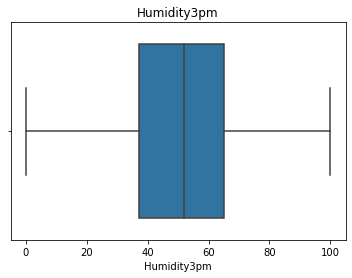

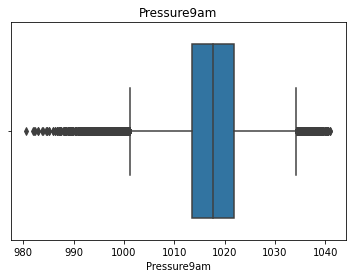

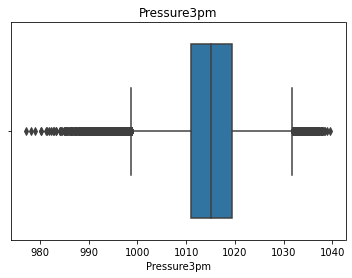

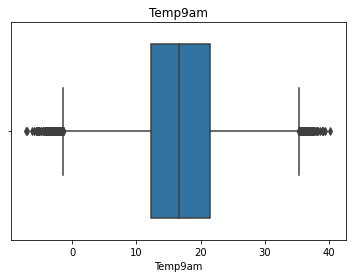

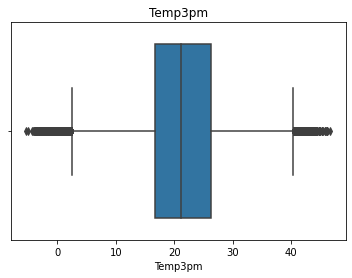

In [40]:
for feature in continuous_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.show()

In [41]:
continuous_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [42]:
q1=df.MinTemp.quantile(0.25)
q3=df.MinTemp.quantile(0.75)
iqr=q3-q1
lower=df.MinTemp.quantile(0.25)-(iqr*1.5)
upper=df.MinTemp.quantile(0.75)+(iqr*1.5)
print(lower,upper)

-5.950000000000002 30.450000000000003


In [43]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [44]:
q1=df.MaxTemp.quantile(0.25)
q3=df.MaxTemp.quantile(0.75)
iqr=q3-q1
lower=df.MaxTemp.quantile(0.25)-(iqr*1.5)
upper=df.MaxTemp.quantile(0.75)+(iqr*1.5)
print(lower,upper)

2.700000000000001 43.5


In [45]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [46]:
q1=df.Rainfall.quantile(0.25)
q3=df.Rainfall.quantile(0.75)
iqr=q3-q1
lower=df.Rainfall.quantile(0.25)-(iqr*1.5)
upper=df.Rainfall.quantile(0.75)+(iqr*1.5)
print(lower,upper)

-0.8999999999999999 1.5


In [47]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [48]:
q1=df.Evaporation.quantile(0.25)
q3=df.Evaporation.quantile(0.75)
iqr=q3-q1
lower=df.Evaporation.quantile(0.25)-(iqr*1.5)
upper=df.Evaporation.quantile(0.75)+(iqr*1.5)
print(lower,upper)

-4.600000000000001 14.600000000000001


In [49]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [50]:
q1=df['WindGustSpeed'].quantile(0.25)
q2=df['WindGustSpeed'].quantile(0.75)
iqr=q2-q1
lower_value=df.WindGustSpeed.quantile(0.25)-(iqr*1.5)
upper_value=df.WindGustSpeed.quantile(0.75)+(iqr*1.5)
print(lower_value,upper_value)

8.5 68.5


In [51]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [52]:
q1=df['WindSpeed9am'].quantile(0.25)
q2=df['WindSpeed9am'].quantile(0.75)
iqr=q2-q1
lower_value=df.WindSpeed9am.quantile(0.25)-(iqr*1.5)
upper_value=df.WindSpeed9am.quantile(0.75)+(iqr*1.5)
print(lower_value,upper_value)

-11.0 37.0


In [53]:
df.loc[df['WindSpeed9am']>=37.0,'WindSpeed9am']=37.0
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [54]:
q1=df['WindSpeed3pm'].quantile(0.25)
q2=df['WindSpeed3pm'].quantile(0.75)
iqr=q2-q1
lower_value=df.WindSpeed3pm.quantile(0.25)-(iqr*1.5)
upper_value=df.WindSpeed3pm.quantile(0.75)+(iqr*1.5)
print(lower_value,upper_value)

-3.5 40.5


In [55]:
df.loc[df['WindSpeed3pm']>=40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [56]:
q1=df['Humidity9am'].quantile(0.25)
q2=df['Humidity9am'].quantile(0.75)
iqr=q2-q1
lower_value=df.Humidity9am.quantile(0.25)-(iqr*1.5)
upper_value=df.Humidity9am.quantile(0.75)+(iqr*1.5)
print(lower_value,upper_value)

18.0 122.0


In [57]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [58]:
q1=df['Pressure9am'].quantile(0.25)
q2=df['Pressure9am'].quantile(0.75)
iqr=q2-q1
lower_value=df.Pressure9am.quantile(0.25)-(iqr*1.5)
upper_value=df.Pressure9am.quantile(0.75)+(iqr*1.5)
print(lower_value,upper_value)

1001.0500000000001 1034.25


In [59]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [60]:
q1=df['Pressure3pm'].quantile(0.25)
q2=df['Pressure3pm'].quantile(0.75)
iqr=q2-q1
lower_value=df.Pressure3pm.quantile(0.25)-(iqr*1.5)
upper_value=df.Pressure3pm.quantile(0.75)+(iqr*1.5)
print(lower_value,upper_value)

998.6500000000001 1031.85


In [61]:

df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [62]:
q1=df['Temp9am'].quantile(0.25)
q2=df['Temp9am'].quantile(0.75)
iqr=q2-q1
lower_value=df.Temp9am.quantile(0.25)-(iqr*1.5)
upper_value=df.Temp9am.quantile(0.75)+(iqr*1.5)
print(lower_value,upper_value)

-1.4999999999999982 35.3


In [63]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [64]:
q1=df['Temp3pm'].quantile(0.25)
q2=df['Temp3pm'].quantile(0.75)
iqr=q2-q1
lower_value=df.Temp3pm.quantile(0.25)-(iqr*1.5)
upper_value=df.Temp3pm.quantile(0.75)+(iqr*1.5)
print(lower_value,upper_value)

2.4499999999999993 40.45


In [65]:

df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

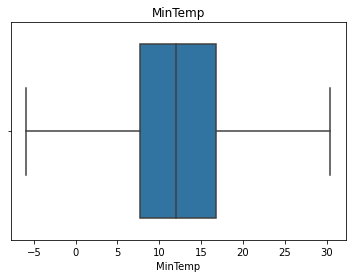

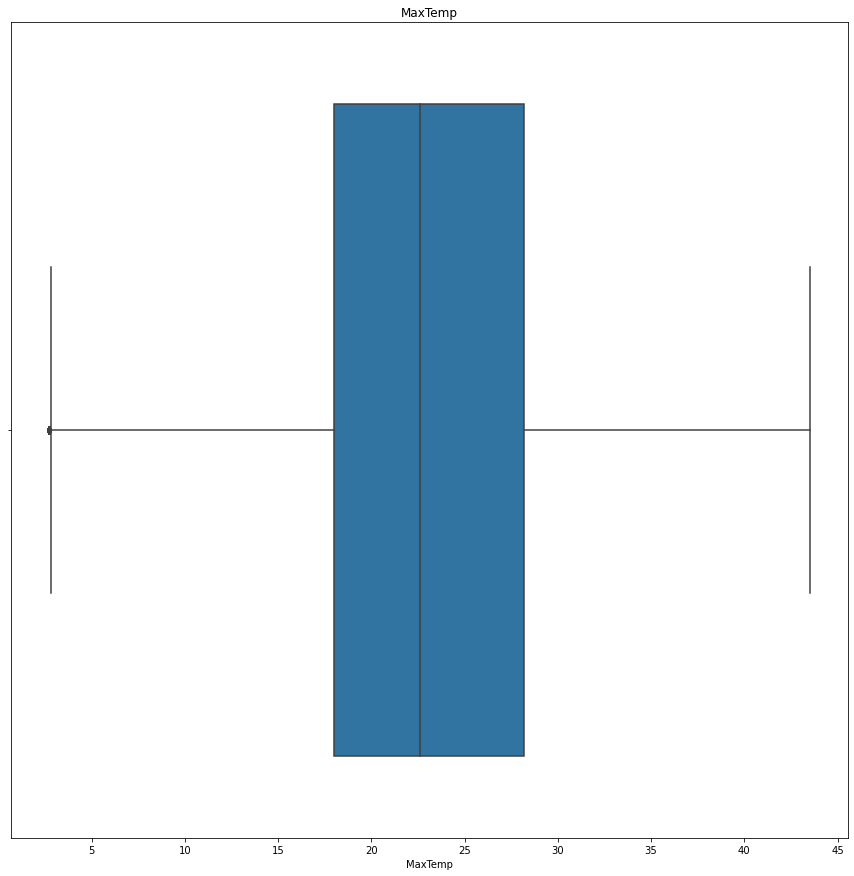

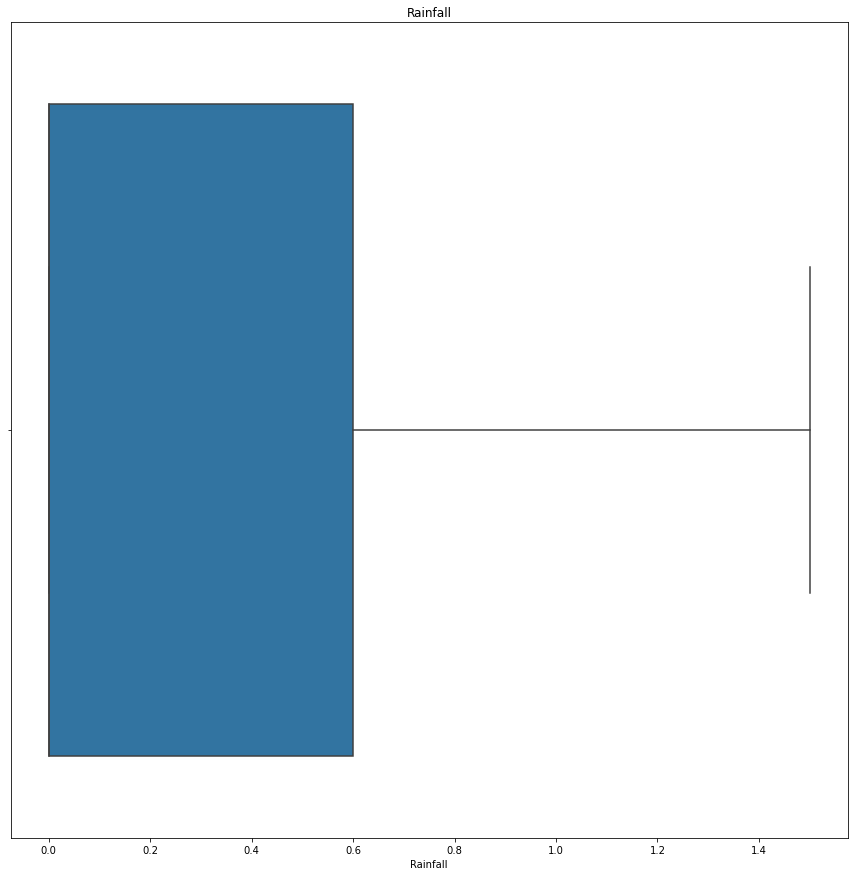

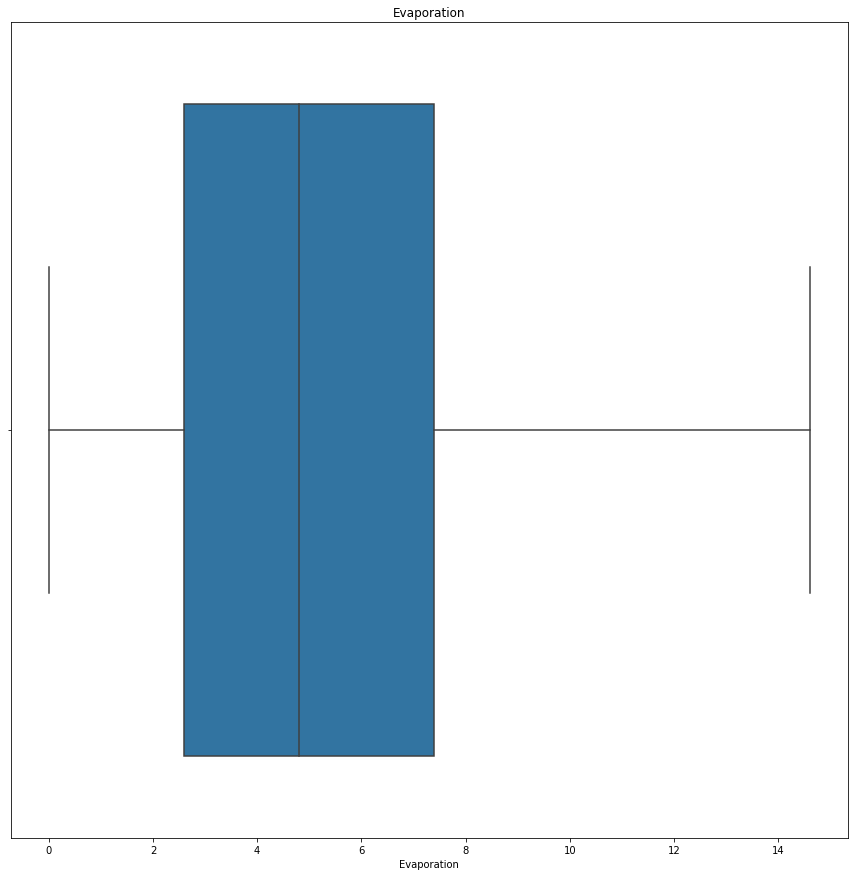

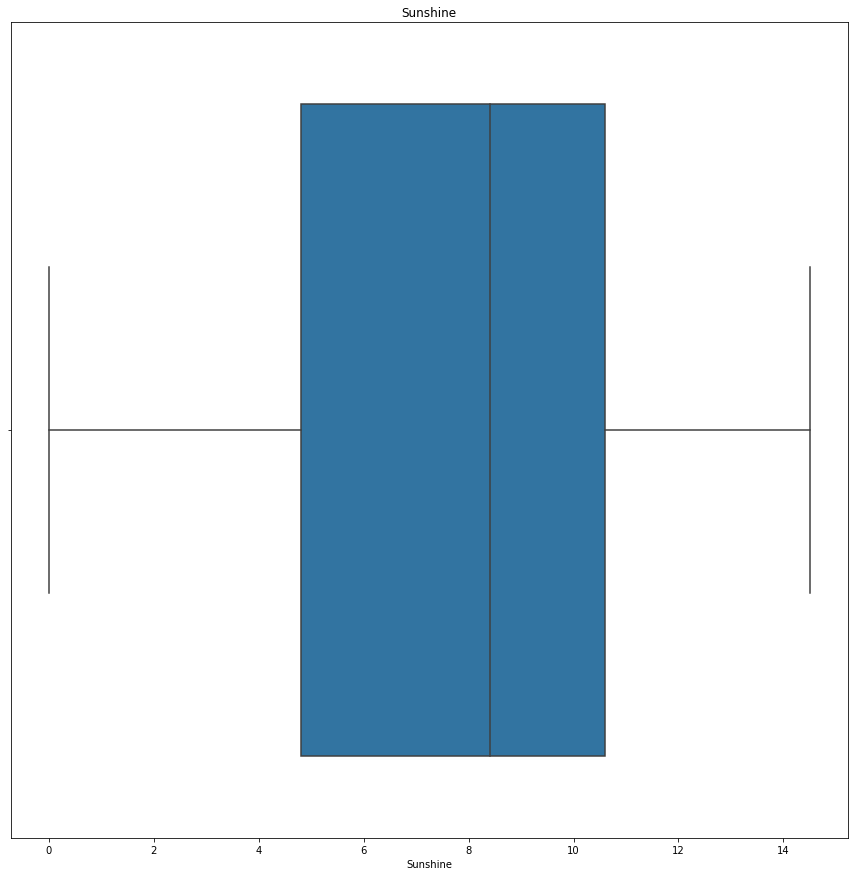

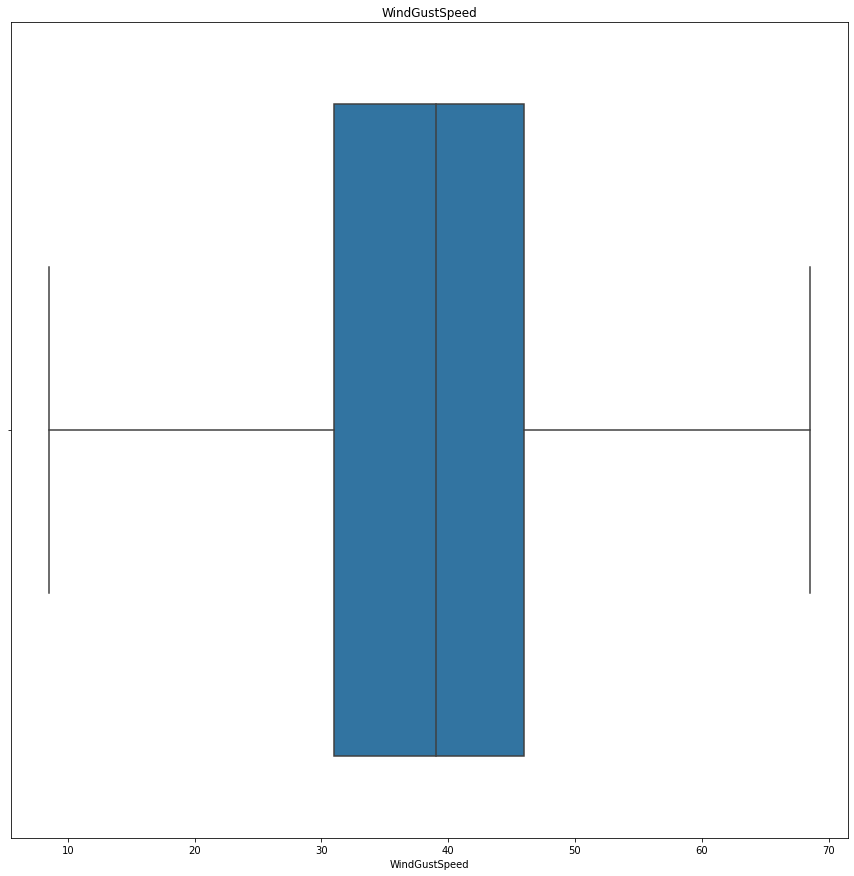

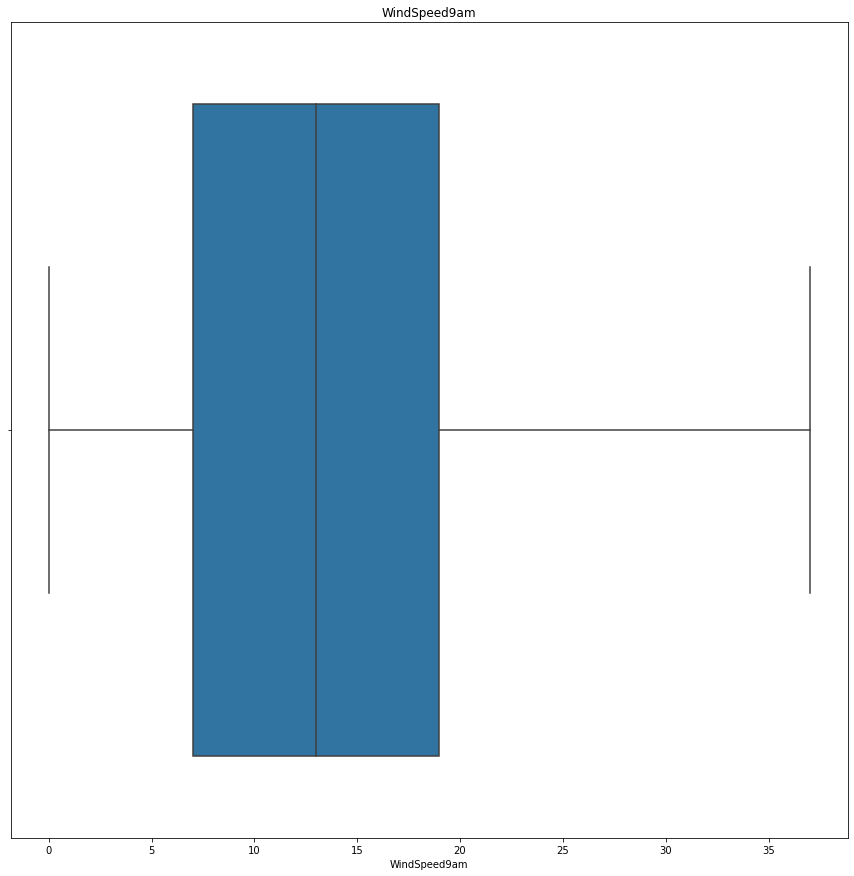

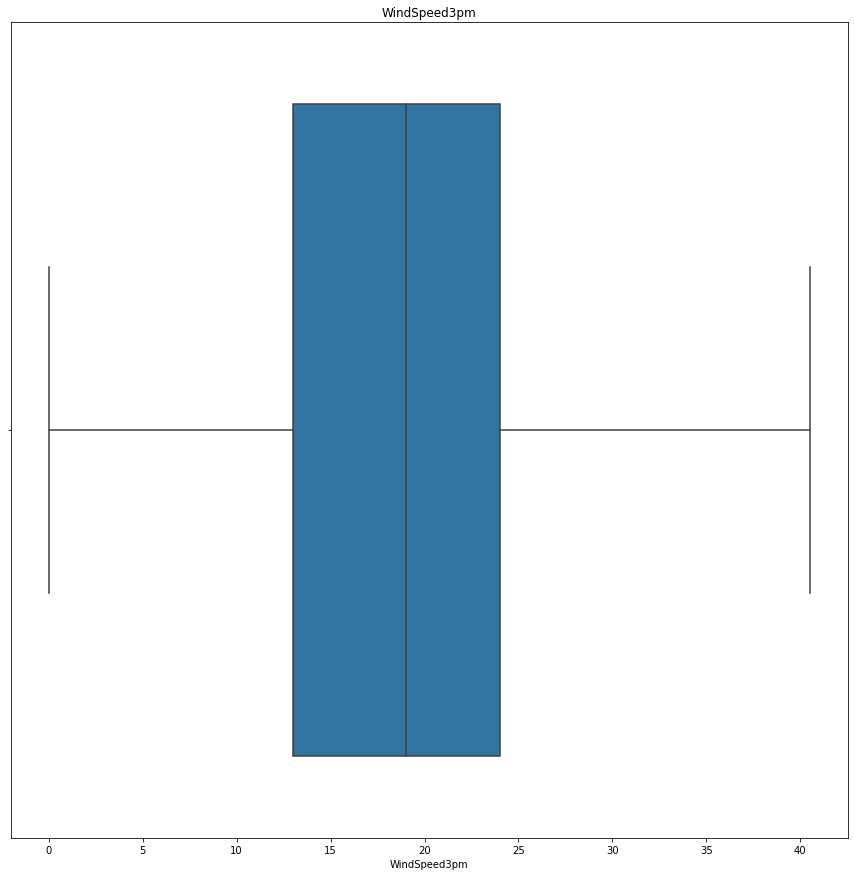

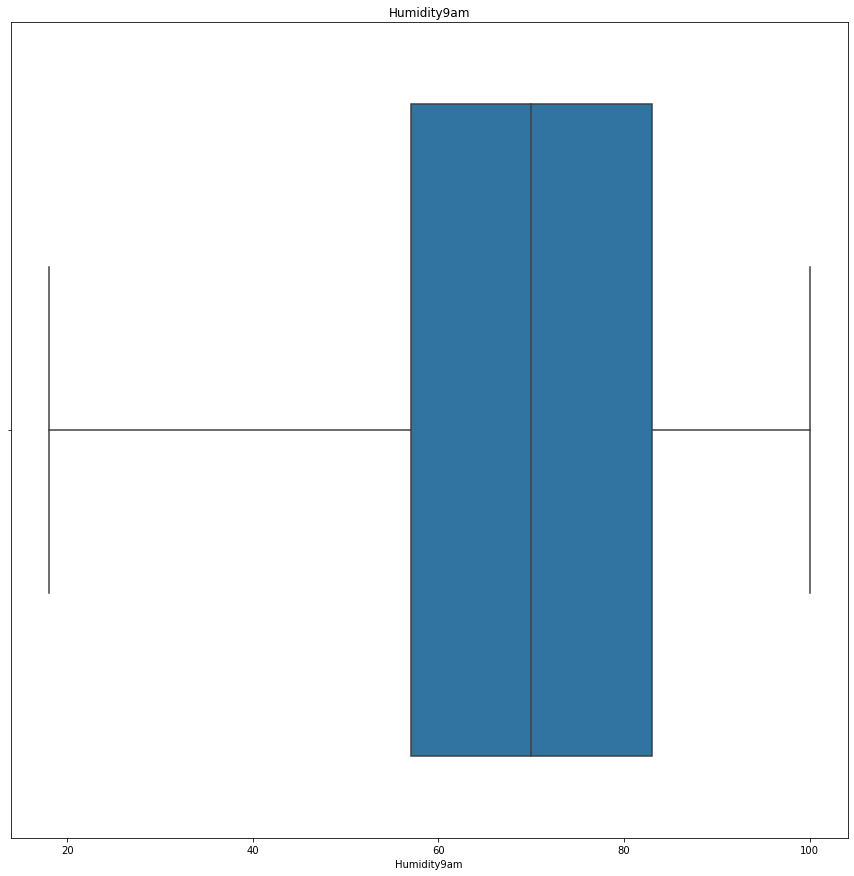

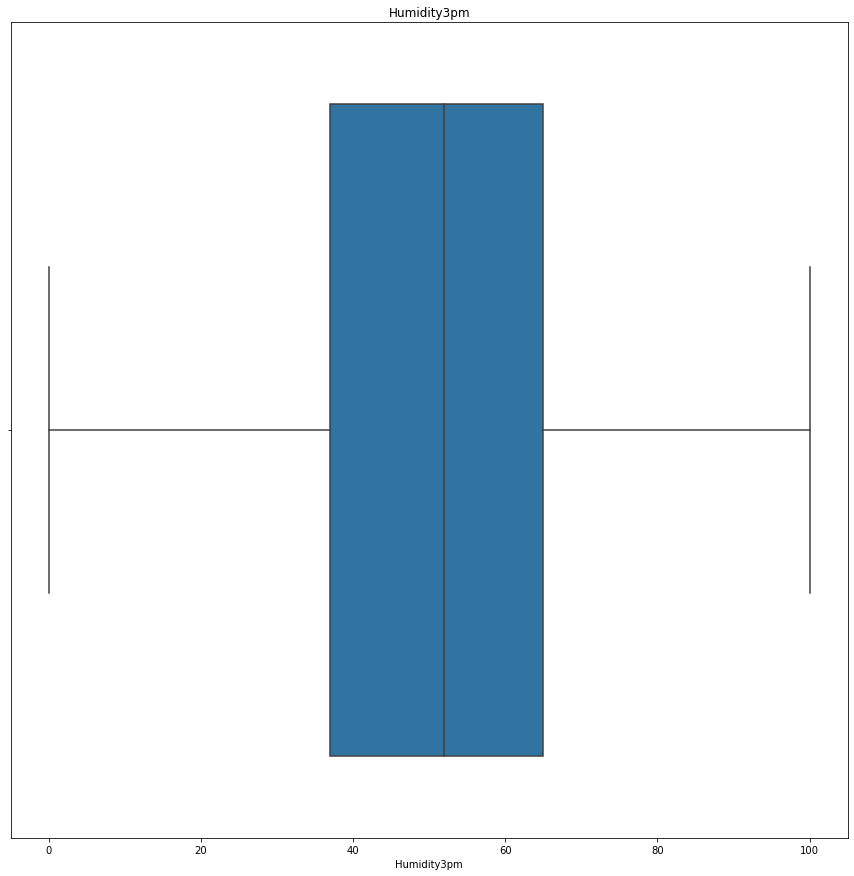

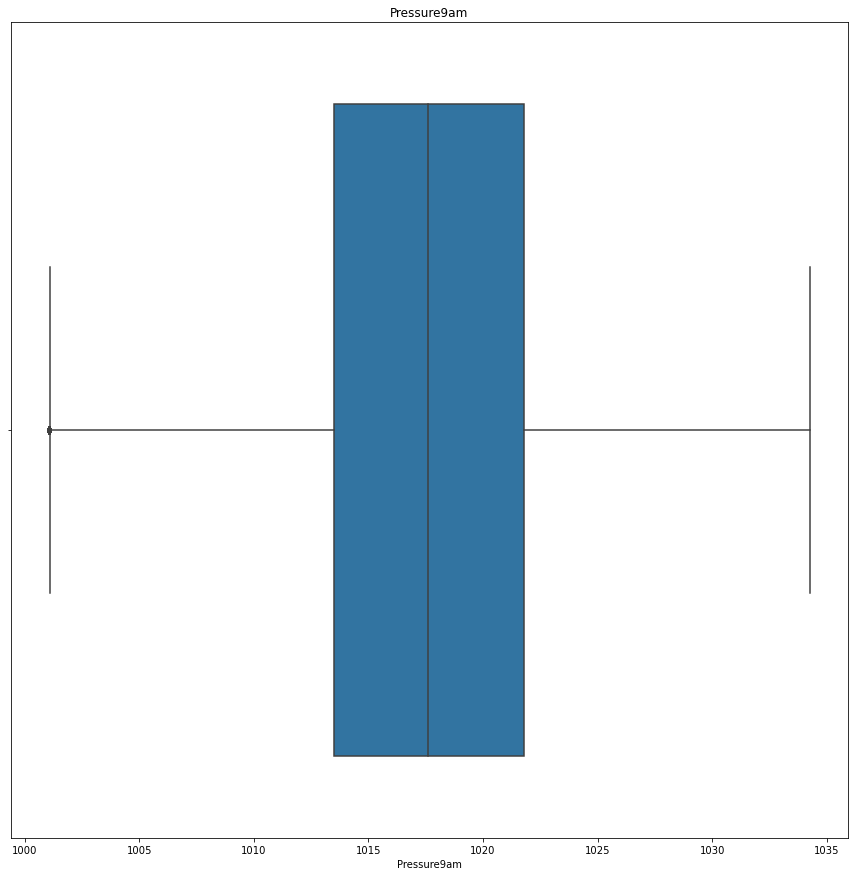

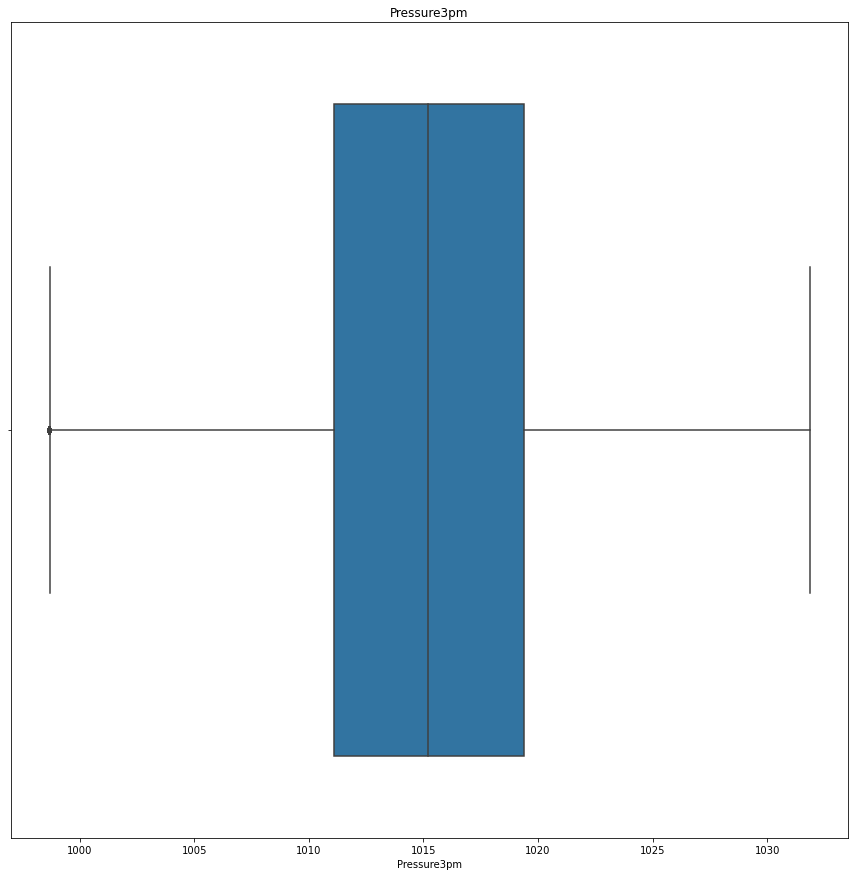

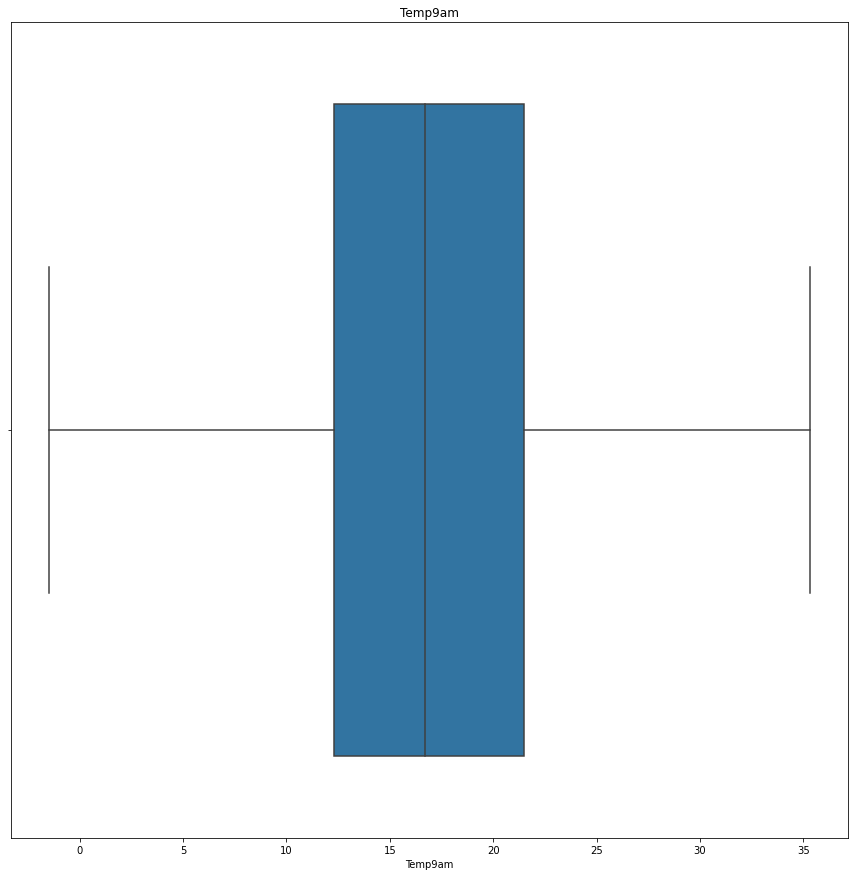

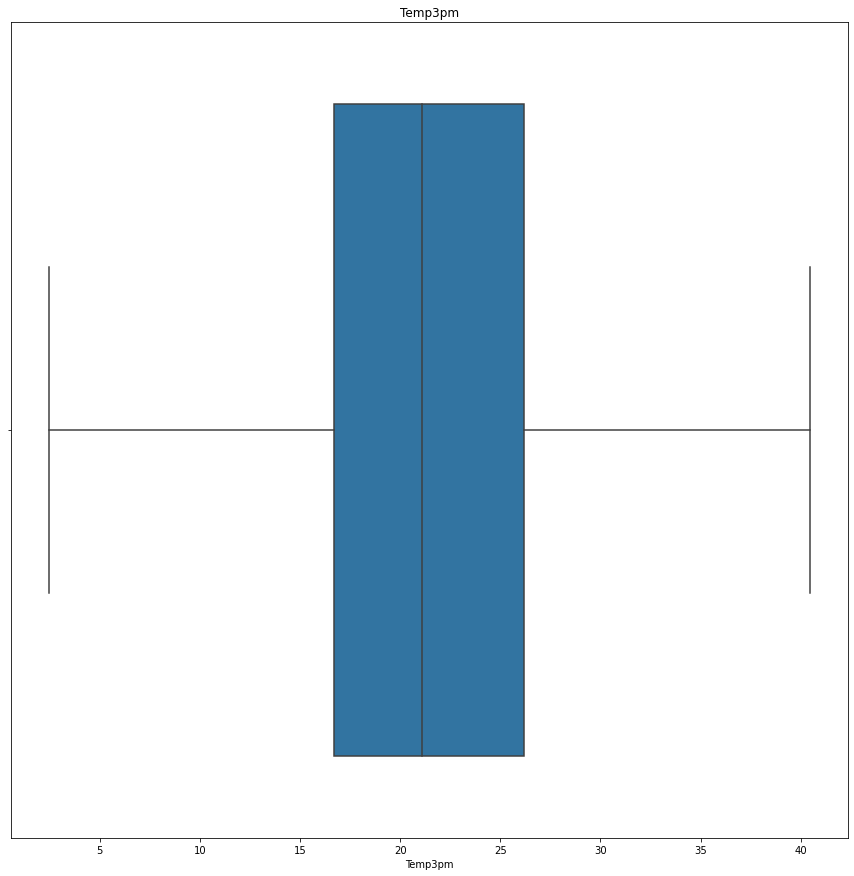

<Figure size 1080x1080 with 0 Axes>

In [66]:
for feature in continuous_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [67]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.289784,12.192336,23.219758,0.381674,5.313828,7.609641,7.311804,39.64328,7.431606,7.532578,...,1017.671706,1015.268537,4.446556,4.508112,16.988221,21.671194,0.219167,0.219146,6.399615,15.712258
std,13.759051,6.364499,7.067804,0.608638,3.415778,3.785983,4.472865,12.17591,4.540584,4.473243,...,6.568469,6.528909,2.887669,2.719517,6.440843,6.813343,0.413683,0.413669,3.427262,8.794789
min,0.000000,-5.950000,2.700000,0.000000,0.000000,0.000000,0.000000,8.50000,0.000000,0.000000,...,1001.050000,998.650000,0.000000,0.000000,-1.490000,2.450000,0.000000,0.000000,1.000000,1.000000
25%,11.000000,7.700000,18.000000,0.000000,2.600000,4.800000,4.000000,31.00000,3.000000,4.000000,...,1013.500000,1011.100000,1.000000,2.000000,12.300000,16.700000,0.000000,0.000000,3.000000,8.000000
50%,23.000000,12.000000,22.600000,0.000000,4.800000,8.400000,7.000000,39.00000,7.431606,7.532578,...,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,6.000000,16.000000
75%,35.000000,16.800000,28.200000,0.600000,7.400000,10.600000,11.000000,46.00000,11.000000,11.000000,...,1021.800000,1019.400000,7.000000,7.000000,21.500000,26.200000,0.000000,0.000000,9.000000,23.000000
max,48.000000,30.450000,43.500000,1.500000,14.600000,14.500000,15.000000,68.50000,15.000000,15.000000,...,1034.250000,1031.850000,9.000000,9.000000,35.300000,40.450000,1.000000,1.000000,12.000000,31.000000


In [68]:
import scipy.stats as stats

In [69]:
def plot(df,feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

MinTemp


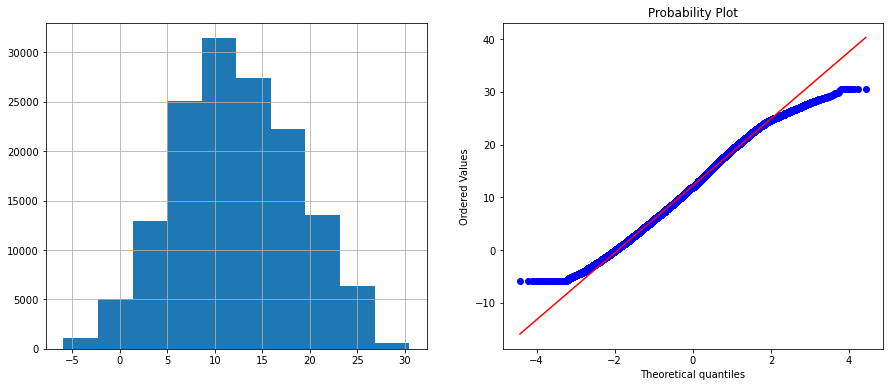

MaxTemp


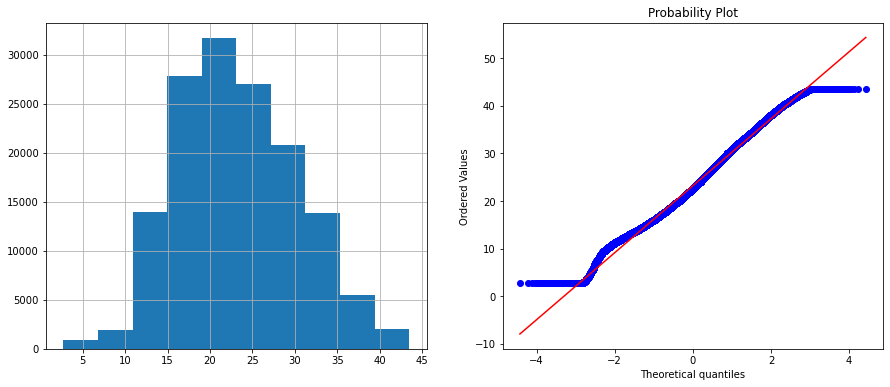

Rainfall


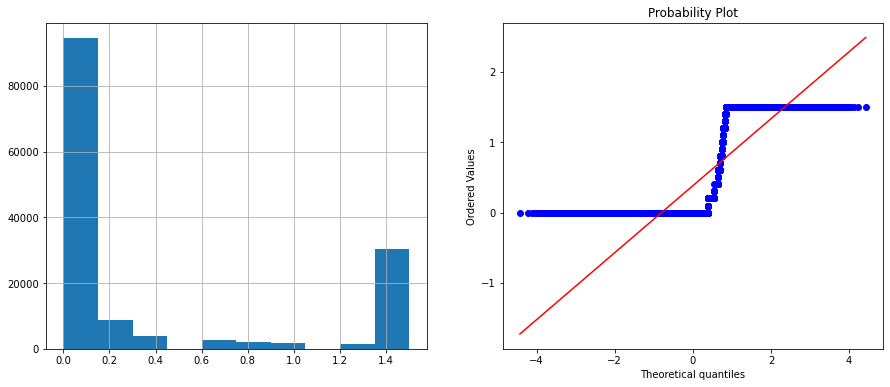

Evaporation


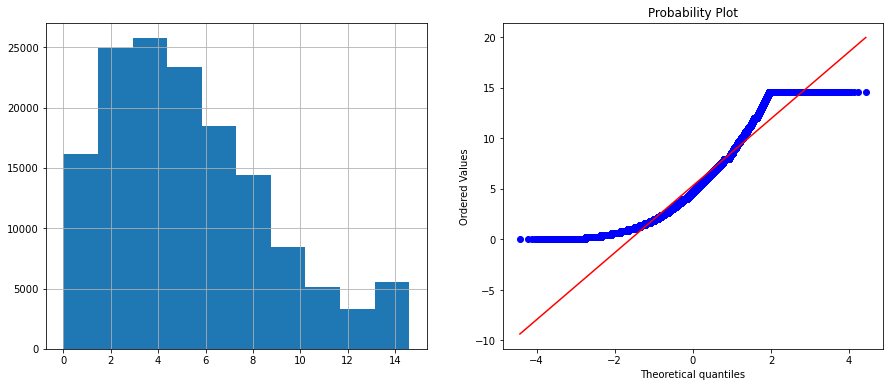

Sunshine


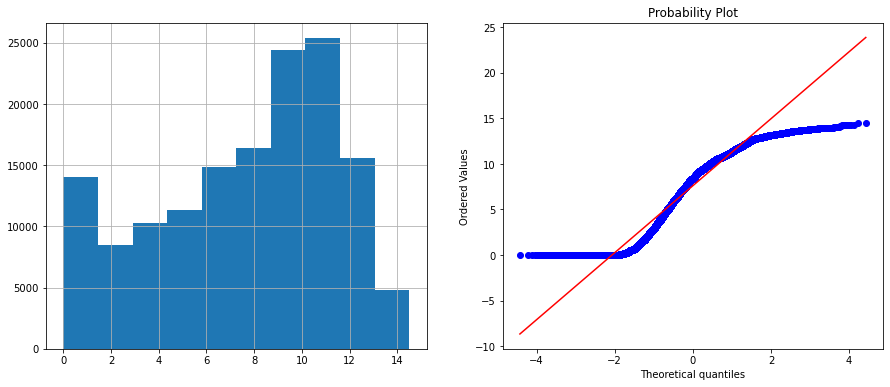

WindGustSpeed


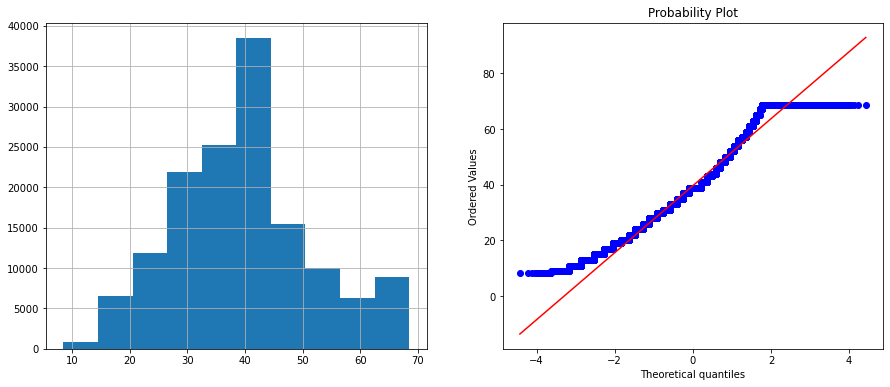

WindSpeed9am


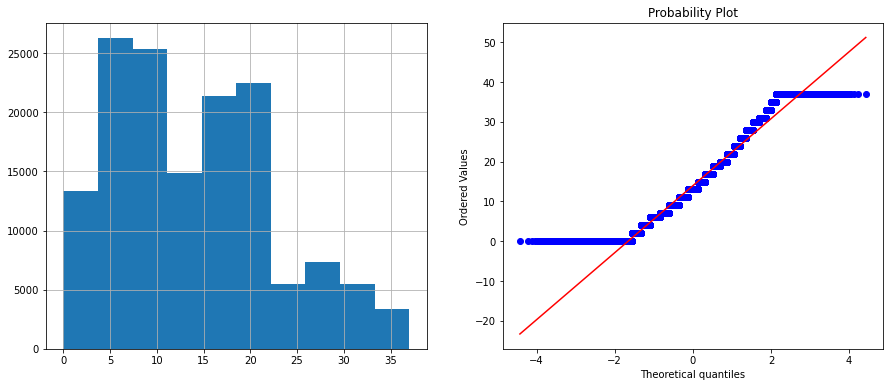

WindSpeed3pm


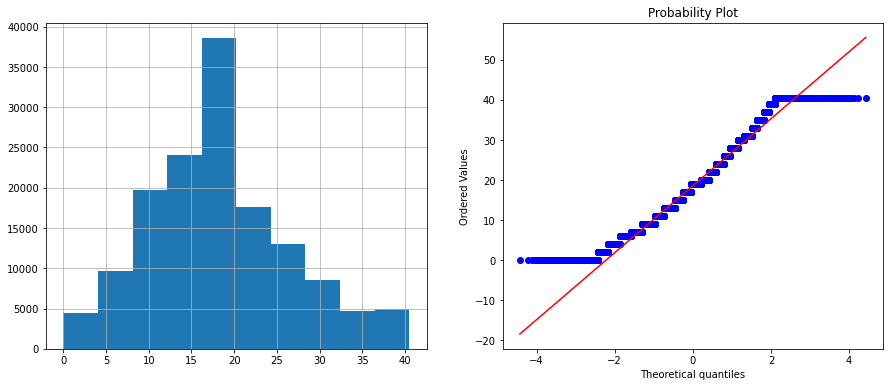

Humidity9am


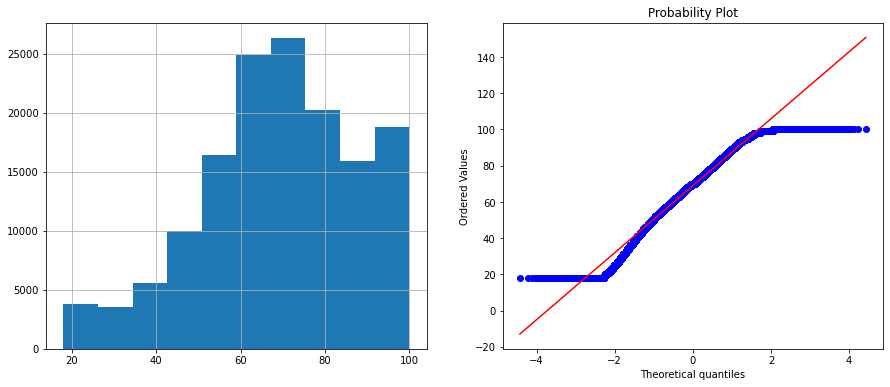

Humidity3pm


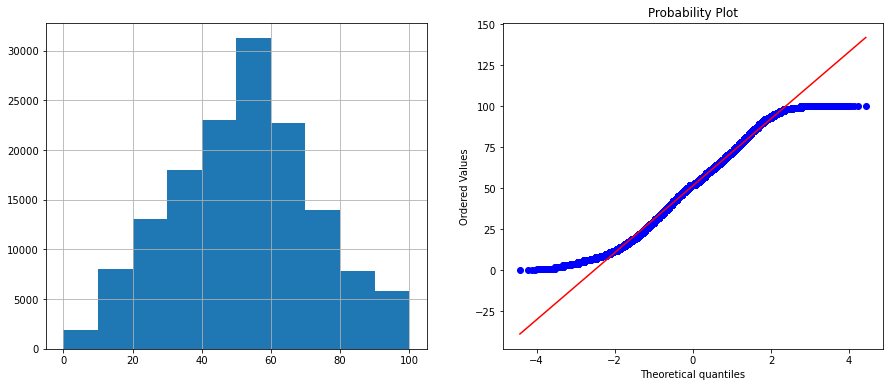

Pressure9am


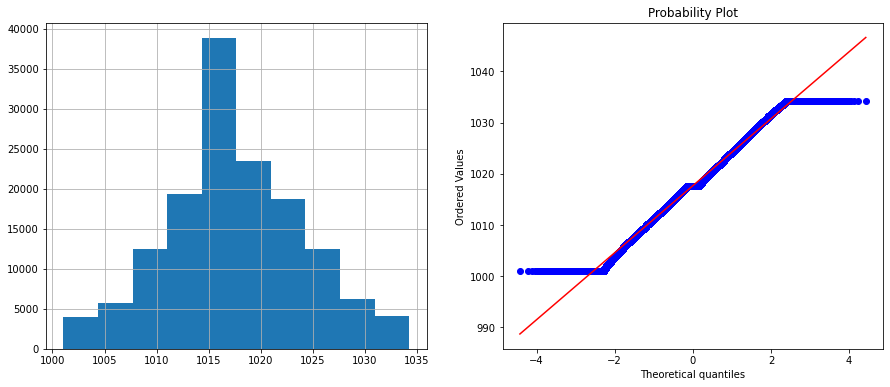

Pressure3pm


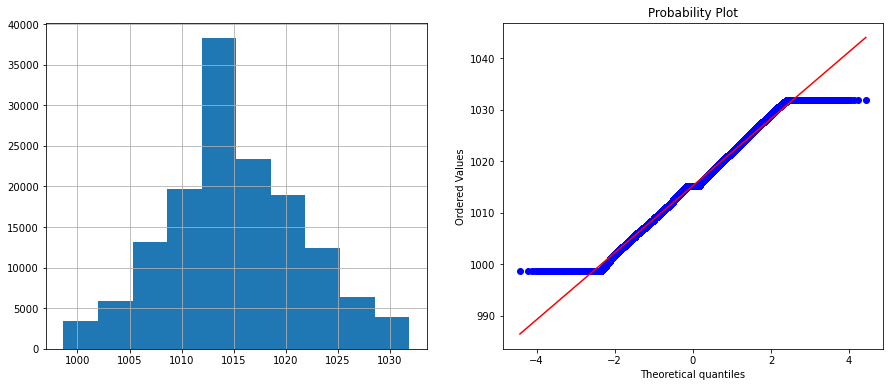

Temp9am


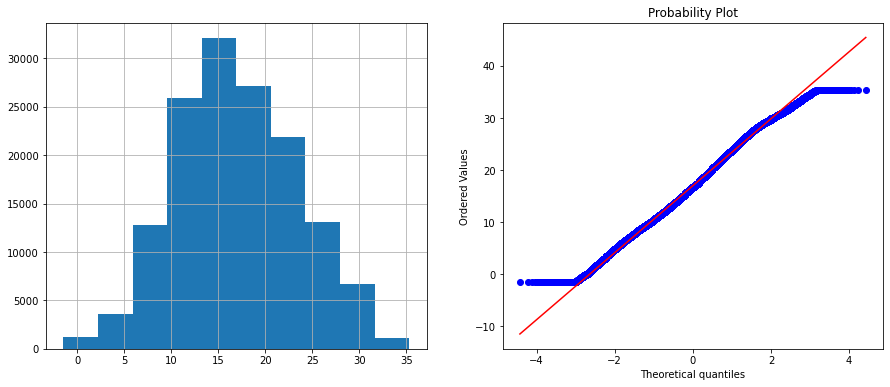

Temp3pm


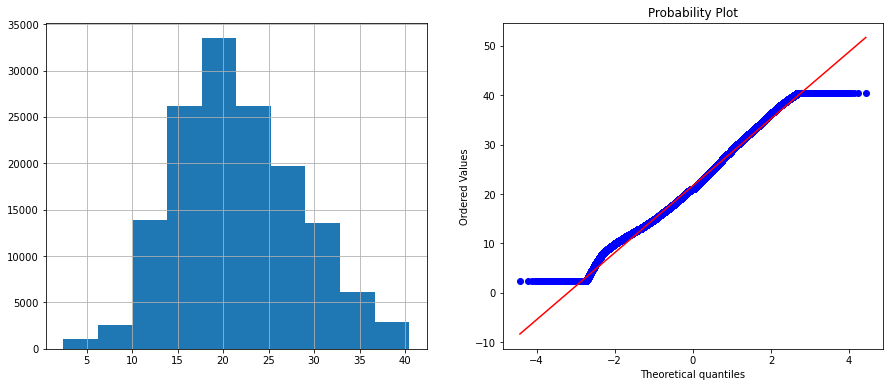

In [70]:
for feature in continuous_features:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
!pip install catboost

In [74]:
from catboost import CatBoostClassifier

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x=df.drop(['RainTomorrow','Date'],axis=1)
y=df['RainTomorrow']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [80]:
from xgboost import XGBClassifier

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [82]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)

In [83]:
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[32669  1426]
 [ 4942  4601]]
0.8540721389614556
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     34095
           1       0.76      0.48      0.59      9543

    accuracy                           0.85     43638
   macro avg       0.82      0.72      0.75     43638
weighted avg       0.85      0.85      0.84     43638



In [84]:
from sklearn import metrics

0.7201545932899454

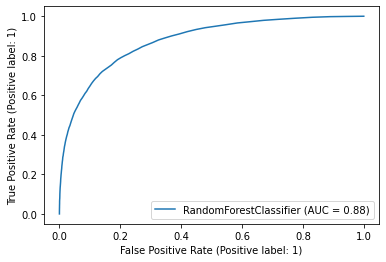

In [85]:
metrics.plot_roc_curve(rf, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

In [86]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred2=lr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[32342  1753]
 [ 5234  4309]]
0.8398872542279665
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34095
           1       0.71      0.45      0.55      9543

    accuracy                           0.84     43638
   macro avg       0.79      0.70      0.73     43638
weighted avg       0.83      0.84      0.83     43638



0.7000599965728099

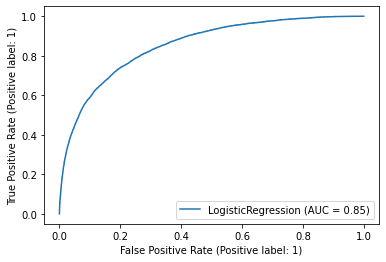

In [88]:
metrics.plot_roc_curve(lr,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred2,average=None)

In [89]:
from collections import Counter
sm=SMOTE()
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)
print('number of classes before fit {}'.format(Counter(y_train)))
print('number of classes after fit {}'.format(Counter(y_train_res)))

number of classes before fit Counter({0: 79488, 1: 22334})
number of classes after fit Counter({0: 79488, 1: 79488})


In [90]:
gn=GaussianNB()
gn.fit(x_train_res,y_train_res)
y_pred=gn.predict(x_test)

In [91]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7510885008478849
[[25776  2543]
 [ 8319  7000]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83     28319
           1       0.73      0.46      0.56     15319

    accuracy                           0.75     43638
   macro avg       0.74      0.68      0.69     43638
weighted avg       0.75      0.75      0.73     43638



0.7447636163153243

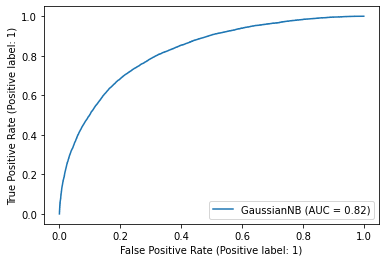

In [92]:
metrics.plot_roc_curve(gn,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred)

In [93]:
knn=KNeighborsClassifier()
knn.fit(x_train_res,y_train_res)
y_pred=knn.predict(x_test)

In [94]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7438700215408589
[[25259  2341]
 [ 8836  7202]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     27600
           1       0.75      0.45      0.56     16038

    accuracy                           0.74     43638
   macro avg       0.75      0.68      0.69     43638
weighted avg       0.75      0.74      0.72     43638



0.7477655333565778

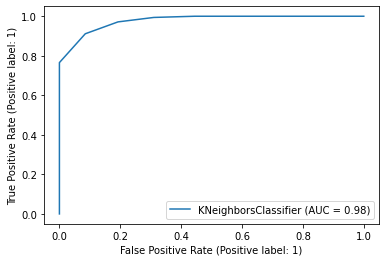

In [95]:
metrics.plot_roc_curve(knn,x_train,y_train)
metrics.roc_auc_score(y_test,y_pred)

In [96]:
svc=SVC()
svc.fit(x_train_res,y_train_res)
y_pred=svc.predict(x_test)

In [97]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7805811448737339
[[26896  2376]
 [ 7199  7167]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     29272
           1       0.75      0.50      0.60     14366

    accuracy                           0.78     43638
   macro avg       0.77      0.71      0.72     43638
weighted avg       0.78      0.78      0.77     43638



0.7699381810324435

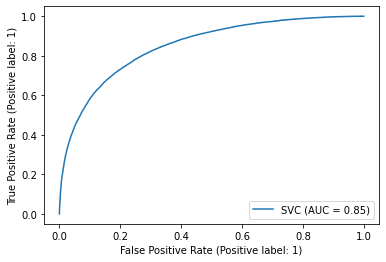

In [98]:
metrics.plot_roc_curve(svc,x_train,y_train)
metrics.roc_auc_score(y_test,y_pred)